### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this

In [3]:
date = "24-12-12"
pathfile = f"Pulling data/{date}/single/"

### From here; automatic run

In [4]:
root = f"/Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/{pathfile}"

MODE = "single"
dev = False

In [5]:
if not root.endswith("/"):
    root += "/"

In [6]:
sep_category = "$" # separates categories like date, experiments, etc
sep_count = "%" # separated the number of hairs by experiment

In [7]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241212$IHNY$25%phosctrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$single.txt
20241212$IHNY$25%phosctrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$single.txt
20241212$IHNY$25%AActrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$ single.txt
20241212$IHNY$25%AActrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$ single.txt


In [8]:
savepath = f"{root}plots/"
if dev: 
    savepath = f"{root}plots/dev/"
    import plotting_dev as plotting
os.makedirs(savepath, exist_ok=True)

In [9]:
all_dfs = []
# we add a prefix to name, so if two experiments have the same name in two files
# that are plotted together, they don't get merge because of the same name
prefix = "A"
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = plotting.get_df_from_file(root + file,
                                       skip=10)
        # clean the df
        if MODE in file:
            df = plotting.clean_single(df)
            assert "single" in file
        else:
            raise ValueError(f"Not a {MODE} experiment")

        splitted_name = file.split(sep_category)
        # get the experiments; i.e. not the date
        # not the single or triple etc
        splitted_name = splitted_name[2:-1]
        print("splitted_name: ", splitted_name)
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split(sep_count)
            _times = int(times_name[0])
            _name = times_name[1]
            _name = prefix + "_" + _name
            all_names += [_name] * _times
        print(f"len df: {len(df)}, len names: {len(all_names)}")
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)

        # update prefix
        prefix = chr(ord(prefix) + 1)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241212$IHNY$25%phosctrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$single.txt
splitted_name:  ['25%phosctrl', '25% KPMI NPYS 0.01', '25%KPMI NPYS 0.03', '25% KPMI NPYS 0.05']
len df: 100, len names: 100
20241212$IHNY$25%phosctrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$single.txt
splitted_name:  ['25%phosctrl', '25% KPM2 NPYS 0.01', '25%KPM2 NPYS 0.03', '25% KPM2 NPYS 0.05']
len df: 100, len names: 100
20241212$IHNY$25%AActrl$25% KPM2 NPYS 0.01$25%KPM2 NPYS 0.03$25% KPM2 NPYS 0.05$ single.txt
splitted_name:  ['25%AActrl', '25% KPM2 NPYS 0.01', '25%KPM2 NPYS 0.03', '25% KPM2 NPYS 0.05']
len df: 100, len names: 100
20241212$IHNY$25%AActrl$25% KPMI NPYS 0.01$25%KPMI NPYS 0.03$25% KPMI NPYS 0.05$ single.txt
splitted_name:  ['25%AActrl', '25% KPMI NPYS 0.01', '25%KPMI NPYS 0.03', '25% KPMI NPYS 0.05']
len df: 100, len names: 100


,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,1.0,3252.9,30.09,0.536000,4.95800,5.641000e-08,0.004682,0.2326,18.400,0.8308,47.800,0.000020,35.926,0.5376,165.3,A_phosctrl
1,2.0,3982.4,30.22,0.676800,5.13600,0.000000e+00,0.010260,0.2316,17.610,0.8934,50.870,0.000028,54.831,0.8486,213.1,A_phosctrl
2,3.0,5055.4,29.97,0.004803,0.02848,0.000000e+00,0.009642,0.2002,5.434,0.8342,5.822,0.000005,45.579,0.9531,188.5,A_phosctrl
3,4.0,5558.8,30.12,0.956600,5.18300,2.453000e-09,0.009279,0.2324,16.770,0.8300,47.830,0.000033,44.489,0.8834,158.9,A_phosctrl
4,5.0,5363.2,30.17,0.813000,4.57300,6.401000e-07,0.012520,0.2320,10.240,0.8286,37.230,0.000023,54.292,1.0180,189.8,A_phosctrl


In [10]:
df.head(15)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,1.0,3752.1,30.20,0.70120,5.64400,1.472000e-08,0.010380,0.2318,17.390,0.8940,53.860,0.000027,58.212,0.7824,208.5,D_AActrl
1,2.0,5170.6,30.57,0.74400,4.39900,0.000000e+00,0.014270,0.2617,15.560,0.8505,41.650,0.000027,57.998,1.1220,217.1,D_AActrl
2,3.0,5295.5,30.15,0.01313,0.07478,9.565000e-08,0.012230,0.2322,3.427,0.8955,4.168,0.000004,54.196,1.0170,192.0,D_AActrl
3,4.0,3574.6,30.13,0.66530,5.60800,0.000000e+00,0.006699,0.2323,22.230,0.8297,55.300,0.000025,41.752,0.7132,199.5,D_AActrl
4,5.0,5758.3,30.21,0.94150,4.93900,0.000000e+00,0.010720,0.2317,17.460,0.8606,49.070,0.000038,45.813,1.0400,180.7,D_AActrl
6,7.0,3221.1,30.60,0.57460,5.45900,0.000000e+00,0.006786,0.2614,25.130,0.8497,57.410,0.000024,47.941,0.6244,193.9,D_AActrl
7,8.0,2721.5,30.60,0.54310,6.10600,0.000000e+00,0.005449,0.2941,25.590,0.8824,61.280,0.000021,44.935,0.4979,182.9,D_AActrl
8,9.0,2843.2,30.51,0.53430,5.73400,0.000000e+00,0.005623,0.2622,26.400,0.8522,60.210,0.000022,43.002,0.5626,197.9,D_AActrl
9,10.0,3187.2,30.56,0.58510,5.61100,0.000000e+00,0.006760,0.2945,25.700,0.8835,59.100,0.000024,46.237,0.6269,196.7,D_AActrl
11,12.0,3057.7,30.56,0.53900,5.38700,0.000000e+00,0.004186,0.2945,25.830,0.8835,57.910,0.000023,33.050,0.5195,169.9,D_AActrl


In [11]:
df.tail(10)

,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
89,90.0,3417.4,30.51,0.5396,4.817,0.000000e+00,0.007146,0.2622,23.68,0.8522,52.25,0.000023,45.887,0.7265,212.6,D_ KPMI NPYS 0.05
90,91.0,2963.1,30.57,0.5466,5.639,0.000000e+00,0.006244,0.2617,24.83,0.8505,58.11,0.000022,45.993,0.6063,204.6,D_ KPMI NPYS 0.05
91,92.0,5324.1,30.16,0.8529,4.831,4.415000e-08,0.012310,0.2653,17.41,0.8621,46.25,0.000031,50.862,1.1180,210.0,D_ KPMI NPYS 0.05
92,93.0,4741.0,30.11,0.8243,5.235,3.532000e-07,0.012420,0.2657,16.76,0.8635,48.53,0.000028,55.762,1.0260,216.3,D_ KPMI NPYS 0.05
93,94.0,3168.3,30.35,0.6016,5.763,-3.679000e-08,0.007099,0.2306,19.97,0.8237,53.72,0.000021,51.466,0.6083,192.0,D_ KPMI NPYS 0.05
95,96.0,4681.4,30.13,0.8599,5.535,0.000000e+00,0.009193,0.2323,17.39,0.8961,53.13,0.000033,47.527,0.8422,179.9,D_ KPMI NPYS 0.05
96,97.0,5597.4,30.42,1.0350,5.622,2.575000e-07,0.010620,0.2301,19.10,0.8547,53.90,0.000039,43.425,1.0900,194.8,D_ KPMI NPYS 0.05
97,98.0,4174.5,30.24,0.7520,5.447,0.000000e+00,0.007918,0.2315,20.21,0.8267,52.88,0.000028,44.874,0.7858,188.2,D_ KPMI NPYS 0.05
98,99.0,3129.5,30.27,0.5249,5.077,0.000000e+00,0.007146,0.2643,22.73,0.8920,54.55,0.000023,50.710,0.6573,210.0,D_ KPMI NPYS 0.05
99,100.0,4202.6,30.06,0.6721,4.807,7.358000e-08,0.006436,0.2329,15.99,0.8317,45.52,0.000023,38.224,0.7417,176.5,D_ KPMI NPYS 0.05


Statistical significance between A_phosctrl and D_ KPMI NPYS 0.01: p = 0.0104
Statistical significance between A_phosctrl and D_KPMI NPYS 0.03: p = 0.0300
Statistical significance between A_ KPMI NPYS 0.01 and D_ KPMI NPYS 0.01: p = 0.0074
Statistical significance between A_ KPMI NPYS 0.01 and D_KPMI NPYS 0.03: p = 0.0189
Statistical significance between A_ KPMI NPYS 0.01 and D_ KPMI NPYS 0.05: p = 0.0337
Statistical significance between A_KPMI NPYS 0.03 and C_ KPM2 NPYS 0.05: p = 0.0385
Statistical significance between B_phosctrl and C_ KPM2 NPYS 0.05: p = 0.0167
Statistical significance between B_ KPM2 NPYS 0.05 and C_ KPM2 NPYS 0.05: p = 0.0294
Statistical significance between C_ KPM2 NPYS 0.01 and C_ KPM2 NPYS 0.05: p = 0.0231
Statistical significance between C_ KPM2 NPYS 0.05 and D_ KPMI NPYS 0.01: p = 0.0033
Statistical significance between C_ KPM2 NPYS 0.05 and D_KPMI NPYS 0.03: p = 0.0047
Statistical significance between C_ KPM2 NPYS 0.05 and D_ KPMI NPYS 0.05: p = 0.0060
Stati

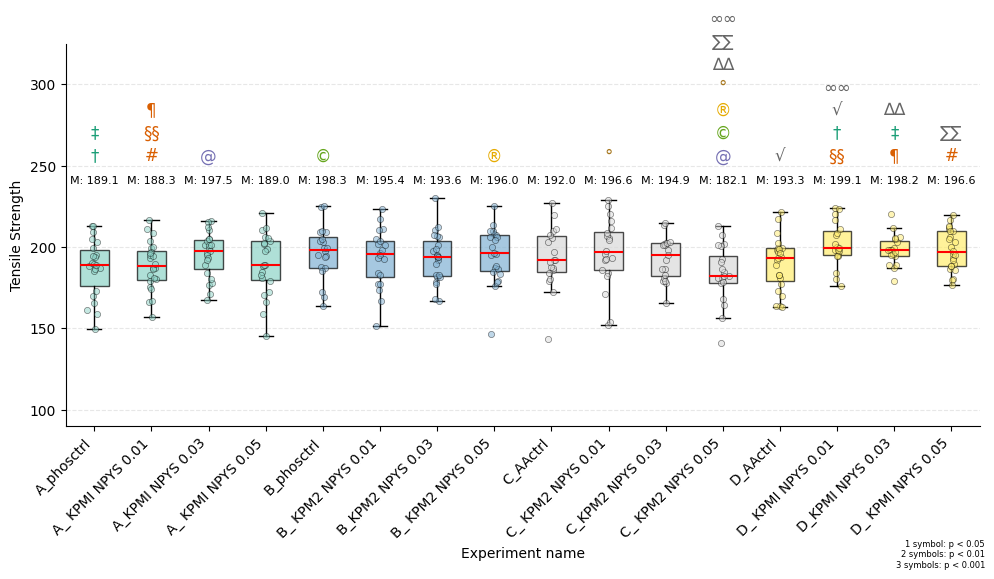

In [12]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [13]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")

Median TENSILE_STRENGTH for A_phosctrl: 188.9
Median TENSILE_STRENGTH for A_ KPMI NPYS 0.01: 188.35
Median TENSILE_STRENGTH for A_KPMI NPYS 0.03: 197.0
Median TENSILE_STRENGTH for A_ KPMI NPYS 0.05: 189.0
Median TENSILE_STRENGTH for B_phosctrl: 199.2
Median TENSILE_STRENGTH for B_ KPM2 NPYS 0.01: 194.7
Median TENSILE_STRENGTH for B_KPM2 NPYS 0.03: 193.6
Median TENSILE_STRENGTH for B_ KPM2 NPYS 0.05: 195.2
Median TENSILE_STRENGTH for C_AActrl: 190.8
Median TENSILE_STRENGTH for C_ KPM2 NPYS 0.01: 194.25
Median TENSILE_STRENGTH for C_KPM2 NPYS 0.03: 194.9
Median TENSILE_STRENGTH for C_ KPM2 NPYS 0.05: 181.75
Median TENSILE_STRENGTH for D_AActrl: 193.3
Median TENSILE_STRENGTH for D_ KPMI NPYS 0.01: 198.7
Median TENSILE_STRENGTH for D_KPMI NPYS 0.03: 198.2
Median TENSILE_STRENGTH for D_ KPMI NPYS 0.05: 196.64999999999998


In [14]:
len(df_merged)

354

Statistical significance between A_ KPMI NPYS 0.01 and D_KPMI NPYS 0.03: p = 0.0099
Statistical significance between A_KPMI NPYS 0.03 and D_ KPMI NPYS 0.01: p = 0.0491
Statistical significance between A_KPMI NPYS 0.03 and D_KPMI NPYS 0.03: p = 0.0042
Statistical significance between B_phosctrl and D_KPMI NPYS 0.03: p = 0.0489
Statistical significance between B_ KPM2 NPYS 0.05 and D_KPMI NPYS 0.03: p = 0.0185
Statistical significance between C_ KPM2 NPYS 0.01 and D_KPMI NPYS 0.03: p = 0.0483
Statistical significance between C_ KPM2 NPYS 0.05 and D_ KPMI NPYS 0.01: p = 0.0225
Statistical significance between C_ KPM2 NPYS 0.05 and D_KPMI NPYS 0.03: p = 0.0088
Statistical significance between D_AActrl and D_KPMI NPYS 0.03: p = 0.0214
0 removed data points for BREAK_STRAIN(*)(#)


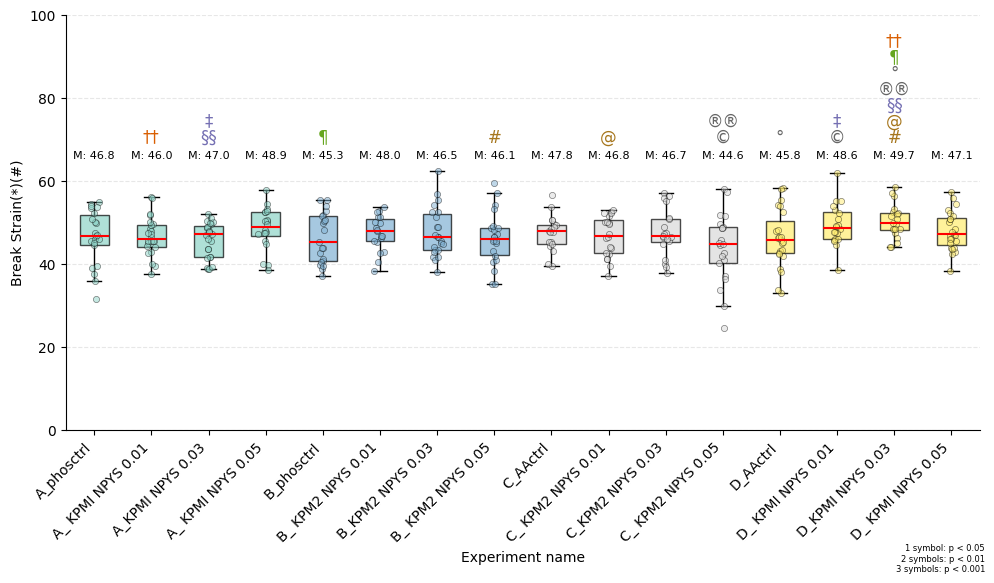

In [15]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between C_ KPM2 NPYS 0.01 and D_ KPMI NPYS 0.05: p = 0.0431
Statistical significance between C_ KPM2 NPYS 0.05 and D_ KPMI NPYS 0.05: p = 0.0338
0 removed data points for BREAK_LOAD


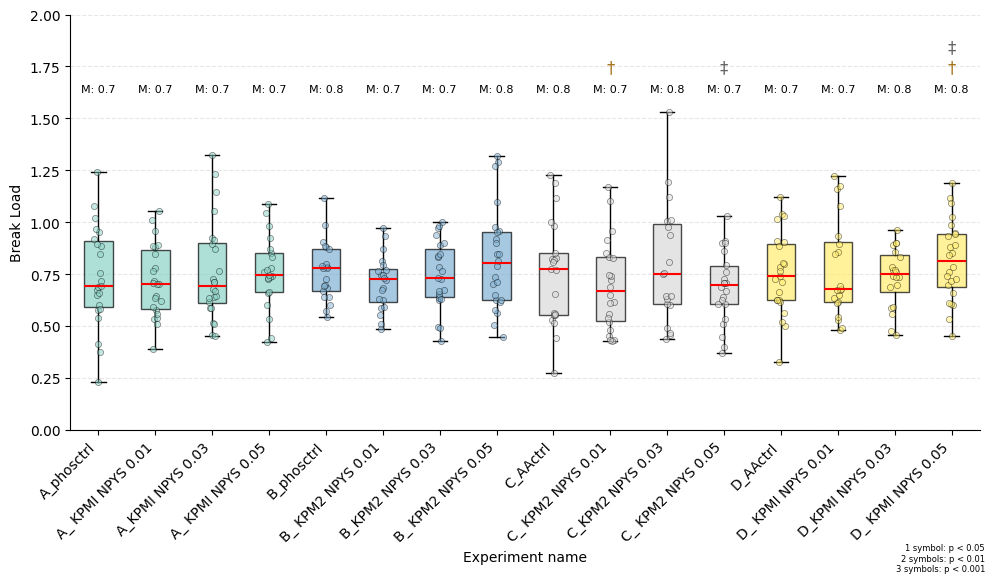

In [16]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between A_phosctrl and A_KPMI NPYS 0.03: p = 0.0417
0 removed data points for EMOD(*)(#)


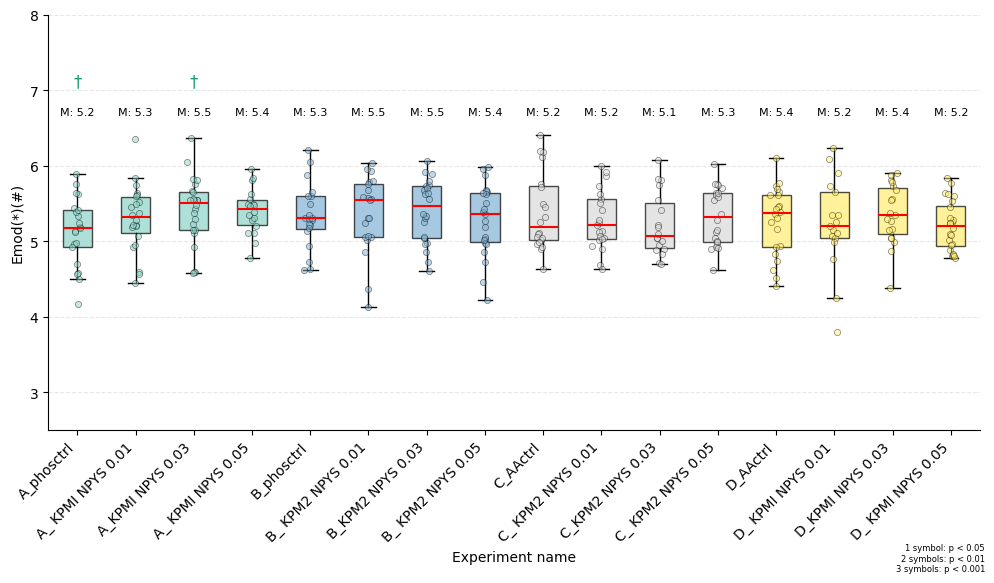

In [17]:
header = 'EMOD(*)(#)'
ymin = 2.5
ymax = 8.0
fig, ax, removed = plotting.create_boxplot(df_merged, header, ymin, ymax)
#save removed data
removed.to_csv(f"{savepath}{header}_removed.csv", index=True)
print(f"{len(removed)} removed data points for {header}")
# plot
fig.savefig(f"{savepath}{header}.png")
plt.show()

### Scatter plots with correlation

In [18]:
df_merged.columns

Index(['RECORD', 'MEAN AREA', 'ESTIMATED_LENGTH(*)', 'GRADIENT(*)',
       'EMOD(*)(#)', 'DECRIMPING_WORK', 'EXTENSION_WORK', 'START_X(*)',
       'START_Y', 'END_X(*)', 'END_Y', 'ANALYSIS_WORK', 'BREAK_STRAIN(*)(#)',
       'BREAK_LOAD', 'TENSILE_STRENGTH', 'Name'],
      dtype='object', name=0)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/single/plots/correlation_plot/scatter_MEAN AREA_vs_TENSILE_STRENGTH.png


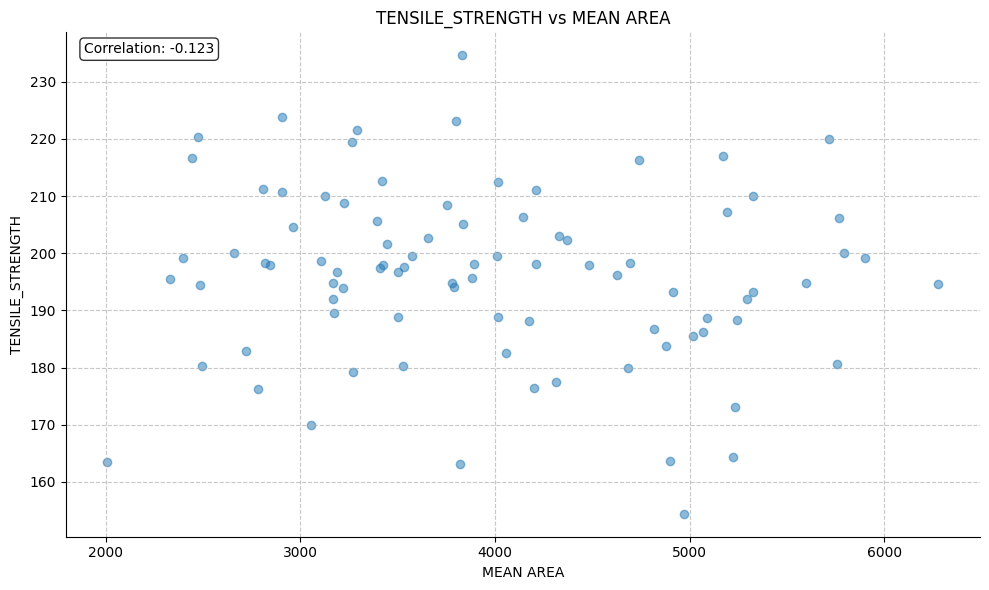

In [19]:
y_col = 'TENSILE_STRENGTH'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/single/plots/correlation_plot/scatter_MEAN AREA_vs_EMOD(*)(#).png


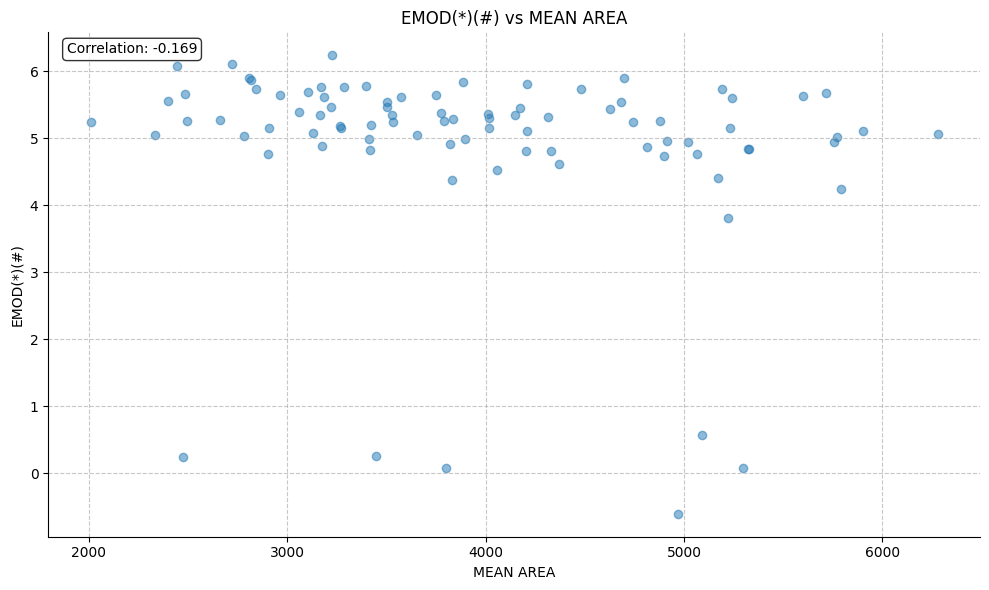

In [20]:
y_col = 'EMOD(*)(#)'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)

Plot saved to: /Users/michaelmoret/Library/CloudStorage/GoogleDrive-michael@externa.bio/.shortcut-targets-by-id/1BdUNsBjDh5Gee_76jCiKB1C_CwG0ercP/Pulling data/24-12-12/single/plots/correlation_plot/scatter_MEAN AREA_vs_BREAK_LOAD.png


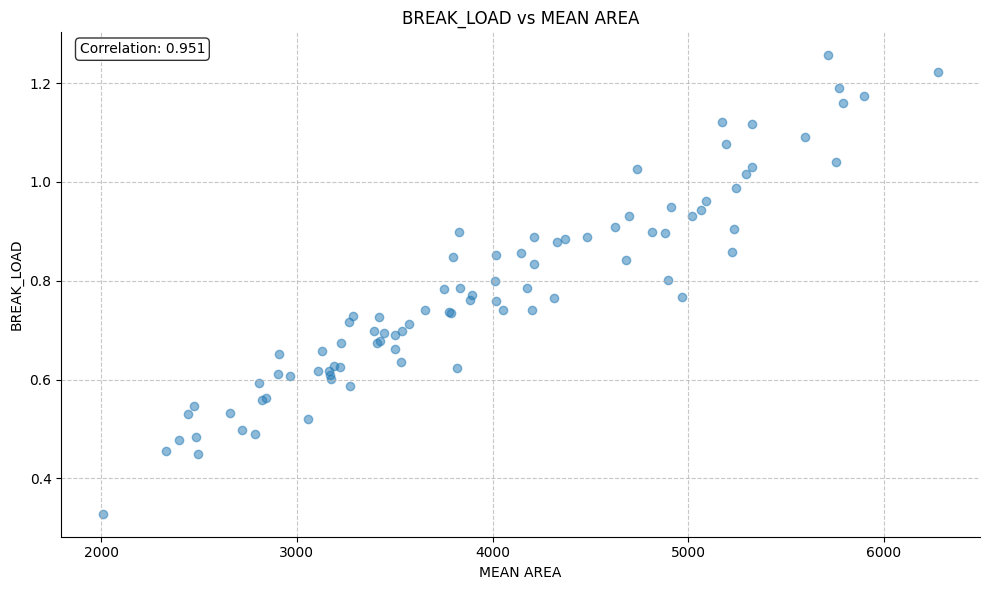

In [21]:
y_col = 'BREAK_LOAD'
x_col = 'MEAN AREA'
savedir = f"{savepath}correlation_plot/"
plt = plotting.create_scatter_plot(df, x_col, y_col, savedir)